<h1>Loan Approval Prediction Project</h1>

<h2>Lifecycle of Machine Learning Project</h2>

1. Understanding of problem Statement
2. Data Collection
3. Data checks for performance
4. Exploratory Data Analysis
5. Data Pre Processing
6. Model Training
7. Choose Best Model

<h3>1. Understanding of Problem Statment</h3>

The company seeks to automate (in real time) the loan approval procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

<h3>2. Data Collection</h3>

Data is collected from AWS

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [117]:
df = pd.read_csv(r"D:\DS_Stats\E2E_DS_Propjects\Loan-Approval-Prediction-Project\raw_data\LoansTrainingSetV2 (1).csv")

In [118]:
df.shape

(111107, 19)

The data consists of 111107 rows and 19 columns

In [119]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

The data has 9 Categorical Features and 10 Numerical Features

<h3>3. Performing Data Check</h3>

- Check for missing values
- Check Duplicates
- Check Datatypes
- Check number of unique values in a column
- Check statistics of data set
- Check Various categories present in different categorical columns

<h4> 3.1 Check for Missing Values

<Axes: >

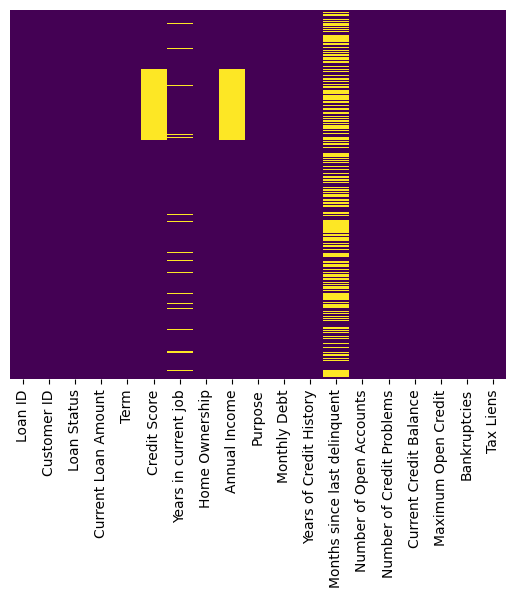

In [121]:
sns.heatmap(data=df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [122]:
null_percentage= df.isnull().sum() / df.shape[0] * 100
columns_with_null = null_percentage[null_percentage > 0]
print(columns_with_null)

Credit Score                    19.204911
Years in current job             4.223856
Annual Income                   19.204911
Months since last delinquent    53.104665
Bankruptcies                     0.205208
Tax Liens                        0.009900
dtype: float64


We can see that 6 columns have null valus with null percentage ranging from 0.009% to 53%

<h4>3.2 Check Duplicates

In [123]:
df.duplicated().sum()

5869

There 5869 rows with dupliate values where all the compones in the entry is duplicate of another entry

In [124]:
df_col_2_duplicate = df[df['Customer ID'].duplicated()==True]
df_col_2_duplicate.shape

(22197, 19)

In [125]:
df_col_1_duplicate = df[df['Loan ID'].duplicated()==True]
df_col_1_duplicate.shape

(22197, 19)

On deeper analysis it was found there are 22197 duplicate entries with same Loan ID and Customer ID. This needs to be removed to reduce overfitting and bias in model. 

In [126]:
df.shape

(111107, 19)

In [127]:

df_duplicates_removed = df.drop_duplicates(subset='Loan ID',keep='first',inplace=False)

In [128]:
df_duplicates_removed.shape

(88910, 19)

22197 duplicate records removed from the data

<h4>3.3 Check Datatypes of Features

In [129]:
column_datatypes = df_duplicates_removed.dtypes
print(column_datatypes)


Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [130]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

In [131]:
print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Categorical Feature which are : {numerical_features}')

We have 9 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Maximum Open Credit']

We have 10 Categorical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies', 'Tax Liens']


<h4>3.4 Check for Unique Values in Feature

In [132]:
df_duplicates_removed.nunique()

Loan ID                         88910
Customer ID                     88910
Loan Status                         2
Current Loan Amount             22081
Term                                2
Credit Score                      326
Years in current job               11
Home Ownership                      4
Annual Income                   36344
Purpose                            16
Monthly Debt                    76609
Years of Credit History           508
Months since last delinquent      116
Number of Open Accounts            52
Number of Credit Problems          14
Current Credit Balance          33716
Maximum Open Credit             58216
Bankruptcies                        8
Tax Liens                          13
dtype: int64

<h4>3.5 Check Statistic for Numerical Features

In [133]:
df_duplicates_removed.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,8.891000e+04,67572.000000,6.757200e+04,88910.000000,40404.000000,88910.000000,88910.000000,8.891000e+04,88718.000000,88902.000000
mean,1.433878e+07,1199.199580,7.234575e+04,18.315313,35.080289,11.110348,0.160477,1.543593e+04,0.112672,0.028222
std,3.502996e+07,1680.813805,5.836101e+04,7.049175,22.008583,4.978461,0.473746,1.965873e+04,0.343300,0.257533
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.283000e+03,714.000000,4.458600e+04,13.500000,16.000000,8.000000,0.000000,5.949000e+03,0.000000,0.000000
50%,1.435500e+04,733.000000,6.149400e+04,17.000000,32.000000,10.000000,0.000000,1.103900e+04,0.000000,0.000000
75%,2.448500e+04,744.000000,8.675025e+04,21.800000,51.000000,14.000000,0.000000,1.930100e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.000000,15.000000


<h4>3.6 Check for various categories present in categorical feature

In [134]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

It seems Monthly Debt and Maximum Open Credit have numerical values but the datatype is object. We will convert these feature to float datatype

In [135]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].str.replace('$','')

In [136]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].astype(float)

In [137]:
df_duplicates_removed['Maximum Open Credit'] = pd.to_numeric(df_duplicates_removed['Maximum Open Credit'], errors='coerce')

In [138]:
df_duplicates_removed['Maximum Open Credit'] = df_duplicates_removed['Maximum Open Credit'].astype(float)

In [139]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Categorical Feature which are : {numerical_features}')

We have 7 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

We have 12 Categorical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [140]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

<h3>4 Exploratory Data Analysis(EDA)

<h4>4.1 Visualisation of Loan Status(Target Feature)

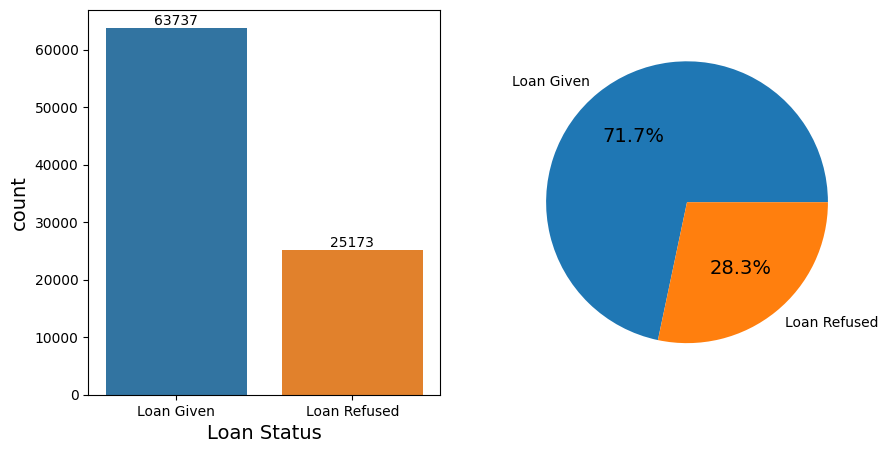

In [141]:
status = df_duplicates_removed['Loan Status'].value_counts()
f,ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x=df_duplicates_removed['Loan Status'],ax=ax[0],data=df_duplicates_removed,order=df_duplicates_removed['Loan Status'].value_counts().index)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=10)
plt.pie(x=df_duplicates_removed['Loan Status'].value_counts(),labels=df_duplicates_removed['Loan Status'].value_counts().index,autopct='%1.1f%%')
plt.show()

No. of Loans Given is 2.5 times more than no. of Loan Refused. This makes the data bias as more number of records are present for Loan Given status.

<h4>4.2 Visualisation of Numerical Categories via Histplot

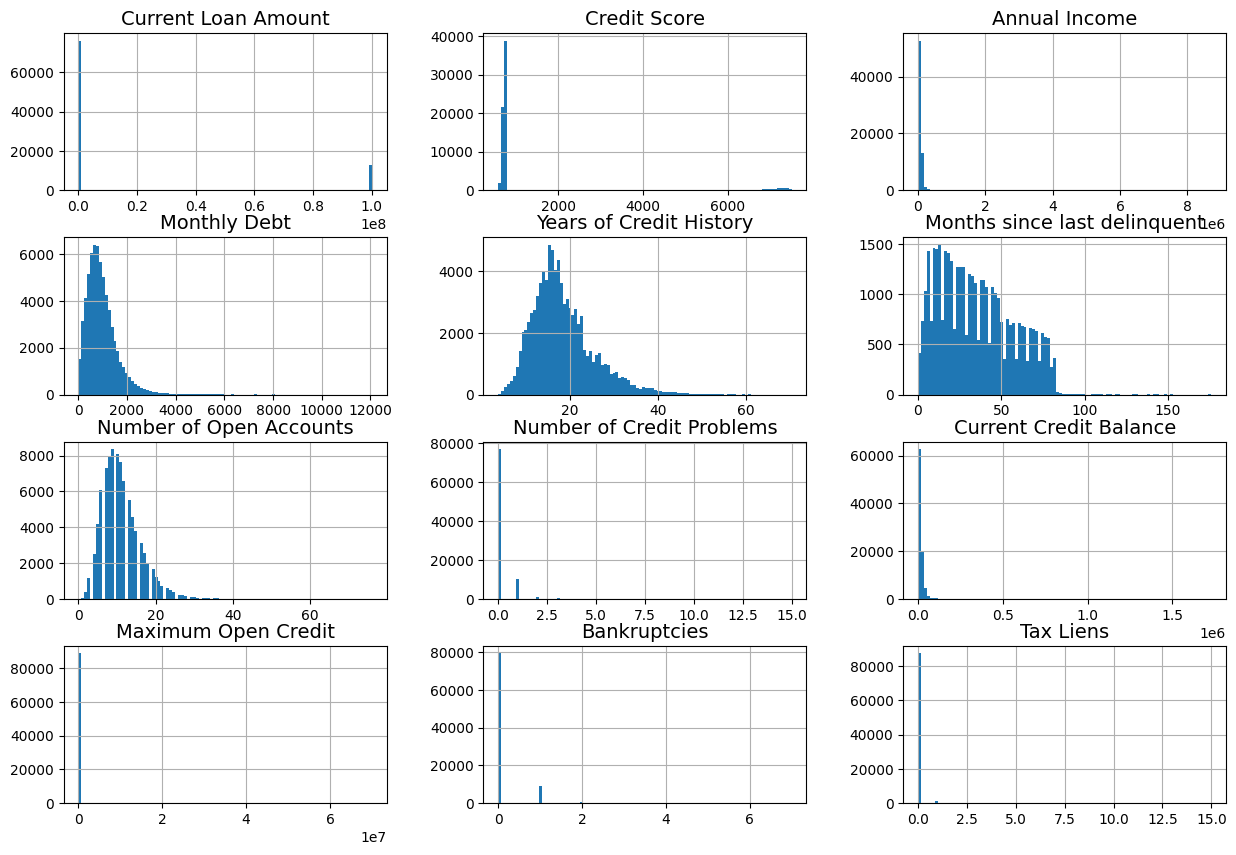

In [142]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed.hist(bins=100, figsize=(15, 10), )
plt.show()

Number of Open Accounts, Monthly Debt, Years of Credit History have as good distribution. Which can be converted to nornal distribution easily

<h4>4.3 Featurewise Analysis

<h5>4.3.1 Current Loan Amount

- How is Current Loan Amount Distributed?
- Does Current Loan Amount have any impact on Loan Status?

Univatriate Analysis

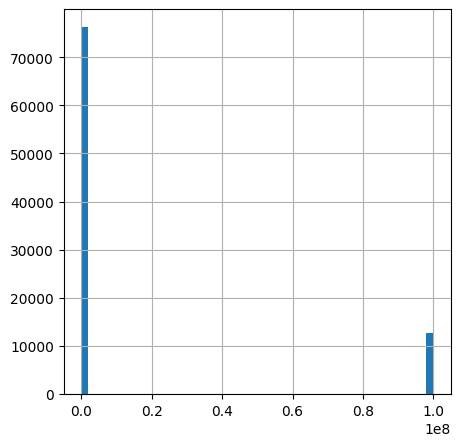

In [143]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Current Loan Amount'].hist(bins=50, figsize=(5, 5), )
plt.show()

It seems there is are outliers in the current loan amount which is  making the plot very skewed. Lets correct the outliers first

In [144]:
df_duplicates_removed['Current Loan Amount'].value_counts().sort_values()

6623            1
11000           1
3798            1
10517           1
18613           1
            ...  
10096          22
10156          23
8066           23
10151          25
99999999    12738
Name: Current Loan Amount, Length: 22081, dtype: int64

In [145]:
Q1 = df_duplicates_removed['Current Loan Amount'].quantile(0.25)
Q3 = df_duplicates_removed['Current Loan Amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = df_duplicates_removed["Current Loan Amount"][
    (df_duplicates_removed["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |
    (df_duplicates_removed["Current Loan Amount"] > (Q3 + 1.5 * IQR))
]

16202.0


In [146]:
outliers.min()

99999999

In [147]:
outliers.value_counts()

99999999    12738
Name: Current Loan Amount, dtype: int64

There are 12738 loans which have outliers.

In [148]:
filtered_df = df_duplicates_removed[df_duplicates_removed["Current Loan Amount"] > (Q3 + 1.5 * IQR)]

#to Understand if these are new to credit of have credit history
grouped_df = filtered_df.groupby('Years of Credit History')['Current Loan Amount'].value_counts()  

print(grouped_df)


Years of Credit History  Current Loan Amount
3.8                      99999999               2
4.0                      99999999               1
4.2                      99999999               4
4.4                      99999999               1
4.5                      99999999               2
                                               ..
52.9                     99999999               1
53.1                     99999999               1
55.8                     99999999               1
57.7                     99999999               1
59.5                     99999999               1
Name: Current Loan Amount, Length: 431, dtype: int64


All these loan have atleast 3.8 Years of credit history. That means they are not new to credit

Let check what is the porpose of taking these loans.

In [149]:
filtered_df_1 = df_duplicates_removed[df_duplicates_removed["Current Loan Amount"] > (Q3 + 1.5 * IQR)]

#to Understand if they have any credit balance
grouped_df_1 = filtered_df_1.groupby('Purpose')['Current Loan Amount'].value_counts().sort_values(ascending=False)  

print(grouped_df_1)


Purpose               Current Loan Amount
Debt Consolidation    99999999               10047
Home Improvements     99999999                 779
other                 99999999                 693
Other                 99999999                 436
Buy a Car             99999999                 202
Medical Bills         99999999                 145
Business Loan         99999999                 138
Buy House             99999999                  79
Take a Trip           99999999                  68
major_purchase        99999999                  54
small_business        99999999                  30
moving                99999999                  22
wedding               99999999                  22
Educational Expenses  99999999                  15
vacation              99999999                   8
Name: Current Loan Amount, dtype: int64


For 78% of the percent of the outlier cases the purpose of taking a new loan is "Debt Consolidation". This is the act of using a new loan to pay off older debts and liabilities. Hence for these cases we can impute median current loan amount.

In [150]:
current_loan_amount_median = df_duplicates_removed['Current Loan Amount'].median()
current_loan_amount_median

14355.0

In [157]:
df_cla_debt_index = df_duplicates_removed[(df_duplicates_removed['Current Loan Amount']>9999998) & (df_duplicates_removed['Purpose'] == 'Debt Consolidation')].index


In [159]:
#df_duplicates_removed.loc[df_cla_debt_index,'Current Loan Amount'] = current_loan_amount_median

In [161]:
Q1 = df_duplicates_removed['Current Loan Amount'].quantile(0.25)
Q3 = df_duplicates_removed['Current Loan Amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = df_duplicates_removed["Current Loan Amount"][
    (df_duplicates_removed["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |
    (df_duplicates_removed["Current Loan Amount"] > (Q3 + 1.5 * IQR))
]


10687.25


<Axes: >

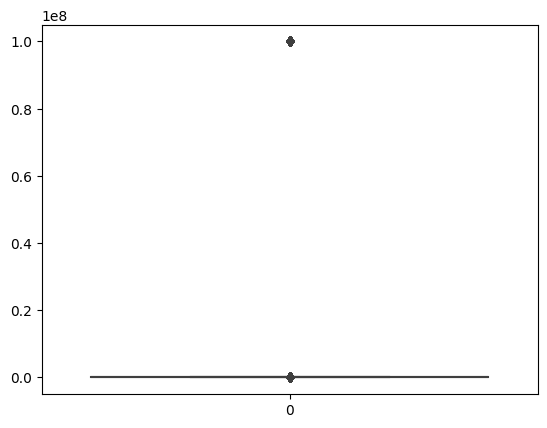

In [160]:
sns.boxplot(data=df_duplicates_removed['Current Loan Amount'])